In [166]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [168]:
path=r"C:\Users\Apeksha\Downloads\creditcardfraud-csv\creditcardfraud-csv\creditcard.csv"
df=pd.read_csv(path)

In [170]:
df=df.drop(['Time','Class','Amount'],axis=1)

In [172]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [174]:
df=StandardScaler().fit_transform(df.values)

In [176]:
df

array([[-0.69424232, -0.04407492,  1.6727735 , ..., -0.39217043,
         0.33089162, -0.06378115],
       [ 0.60849633,  0.16117592,  0.1097971 , ...,  0.26106948,
        -0.02225568,  0.04460752],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.28844675,
        -0.13713686, -0.18102083],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ..., -0.18118178,
         0.01103672, -0.0804672 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  1.133635  ,
         0.26960398,  0.31668678],
       [-0.27233093, -0.11489898,  0.46386564, ..., -1.69685342,
        -0.00598394,  0.04134999]], shape=(284807, 28))

In [178]:
x_train,x_test=train_test_split(df,test_size=0.2,random_state=42)

In [180]:
encoder=Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(8,activation="relu"),
])

In [182]:
decoder=Sequential([
    Input(shape=(8,)),
    Dense(8,activation="relu"),
    Dense(16,activation="relu"),
    Dense(x_train.shape[1],activation="linear"),
])

In [184]:
autoencoder=Sequential([encoder,decoder])

autoencoder.compile(
    optimizer=Adam(),
    loss="mse",
    metrics=["mae"]
)

In [186]:
history=autoencoder.fit(
    x_train,x_train,
    validation_data=(x_test,x_test),
    batch_size=64,
    epochs=15
)

Epoch 1/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7237 - mae: 0.5613 - val_loss: 0.6017 - val_mae: 0.5181
Epoch 2/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5792 - mae: 0.4980 - val_loss: 0.5580 - val_mae: 0.4901
Epoch 3/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5608 - mae: 0.4856 - val_loss: 0.5500 - val_mae: 0.4830
Epoch 4/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5564 - mae: 0.4818 - val_loss: 0.5477 - val_mae: 0.4797
Epoch 5/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5540 - mae: 0.4791 - val_loss: 0.5450 - val_mae: 0.4774
Epoch 6/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5525 - mae: 0.4771 - val_loss: 0.5456 - val_mae: 0.4767
Epoch 7/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5510 - mae: 0.4740 - val_loss: 0.5444 - val_mae: 0.4737
Epoch 8/15
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5499 - mae: 0.4720 - val_loss: 0.5489 - val_mae: 0.4755
Epoch 9/15
3561/3561 ━━━━━━━━━━━━━━━━━━━

In [188]:
recons=autoencoder.predict(x_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step


In [190]:
mse=np.mean(np.power(x_test - recons,2),axis=1)

In [210]:
threshold=np.percentile(mse,95)
anomalies=(mse>threshold).astype(int)

print(threshold)
print(np.sum(anomalies))

1.1575822599521723
2849


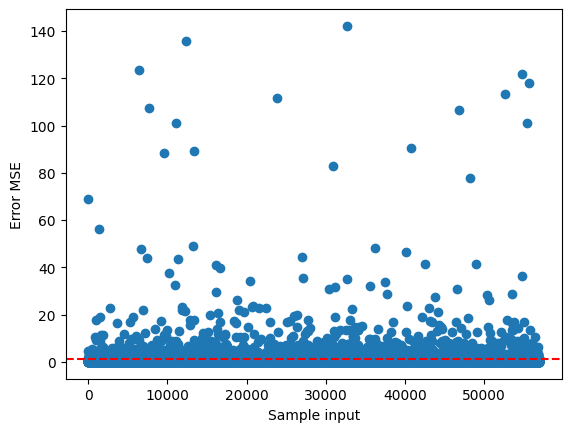

In [212]:
import matplotlib.pyplot as plt

plt.plot(mse,marker="o",linestyle="")
plt.axhline(threshold,color="red",linestyle="--")
plt.xlabel("Sample input")
plt.ylabel("Error MSE")
plt.show()

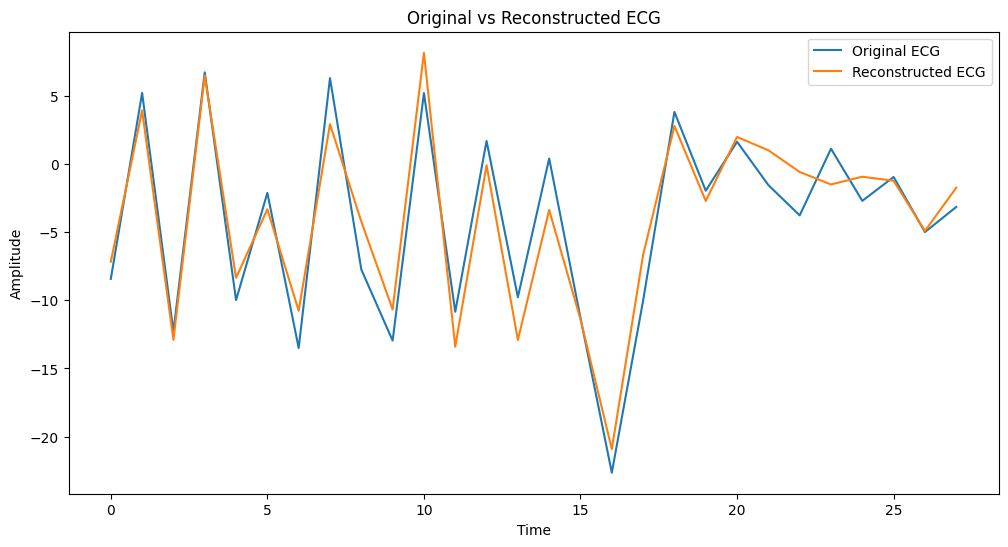

In [214]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(recons[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed ECG')
plt.legend()
plt.show()